# Exercise 4


## Instructions


1. Collect **100-200 images** of the fruit
2. Split the collected images for train, test and validation. Please make sure that there are no duplicate images. Images that are used in train should not appear in test, validation and vice versa.
3. Combine the collected images together with the images of apple, orange and banana. They  are already available in the link below: https://github.com/robitussin/tensorflow_lite_projects/tree/main/images/fruits
4. Create and train a Convolutional Neural Network (CNN).
5. Save the model as **"model.tflite"**
6. Create a folder named **exercise_4** in your **CCDEPLRL_EXERCISES_COM222_ML** repository.
7. Upload the **python notebook (.ipynb)** and the **model (.tflite)** in the exercise_3 folder

Deadline of submission is on **April 22, 2025**

## Model

In [407]:
#!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

In [408]:
#!unzip fruits.zip

Import the libraries

In [409]:
import tensorflow as tf
import matplotlib.pyplot as plt

Hyperparameters: Set the image size and batch size

In [410]:
img_height, img_width = 32, 32
batch_size = 20

Split the images into train, validation and test

In [411]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 600 files belonging to 4 classes.
Found 86 files belonging to 4 classes.
Found 164 files belonging to 4 classes.


Display sample images from the dataset

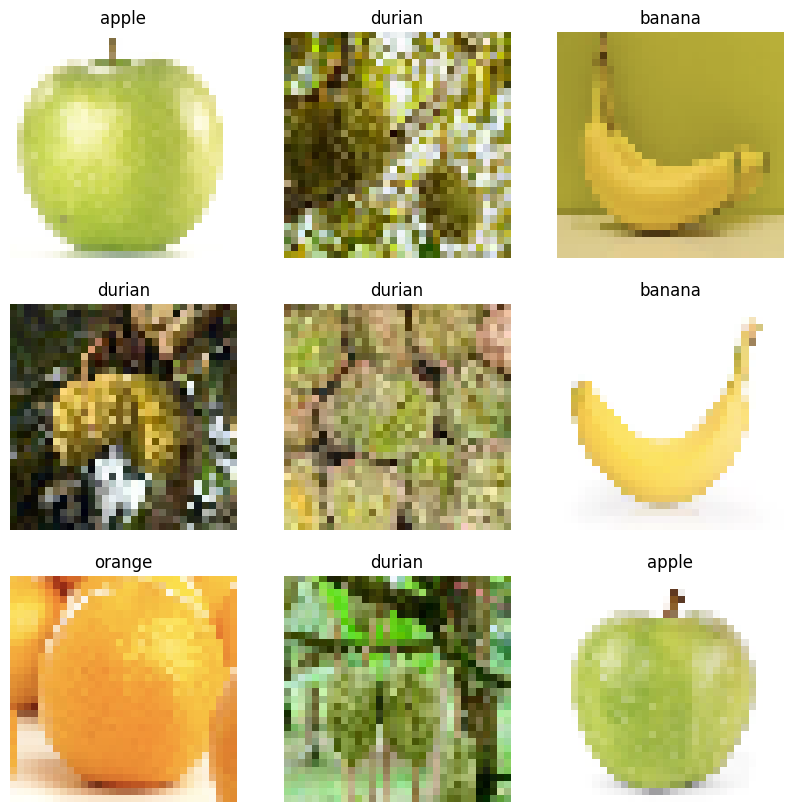

In [412]:
# prompt: Display sample images from the dataset (under the main folder named fruits there are 3 folders inside for test train and validation, the fruits that will be used are "apple", "banana", "orange", "durian")

import matplotlib.pyplot as plt

class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


Create the Convolutional Neural Network Model (CNN)

In [413]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(21, (3, 3), activation='relu', padding='same'),  # Increased filters
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  # Increased filters
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(129, (3, 3), activation='relu', padding='same'), # Increased filters
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),  # Increased units
    tf.keras.layers.Dropout(0.3),                  # Added dropout for regularization
    tf.keras.layers.Dense(len(class_names), activation='softmax') # Added softmax activation
])

Define the optimizer and loss function

In [414]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model

In [415]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 25
)

Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.3787 - loss: 1.3318 - val_accuracy: 0.7674 - val_loss: 0.7645
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8011 - loss: 0.6307 - val_accuracy: 0.9419 - val_loss: 0.4821
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8682 - loss: 0.3497 - val_accuracy: 0.9419 - val_loss: 0.2692
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9096 - loss: 0.2517 - val_accuracy: 0.9419 - val_loss: 0.1885
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9370 - loss: 0.1814 - val_accuracy: 0.8605 - val_loss: 0.4382
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9726 - loss: 0.1241 - val_accuracy: 0.9651 - val_loss: 0.1630
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9589 - loss: 0.1293 - val_accuracy: 0.9767 - val_loss: 0.1090
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9776 - loss: 0.0787 - val_accuracy: 0.9419 - v

Test the model

In [416]:
model.evaluate(test_ds)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.9722 - loss: 0.1543


[0.15155458450317383, 0.9634146094322205]

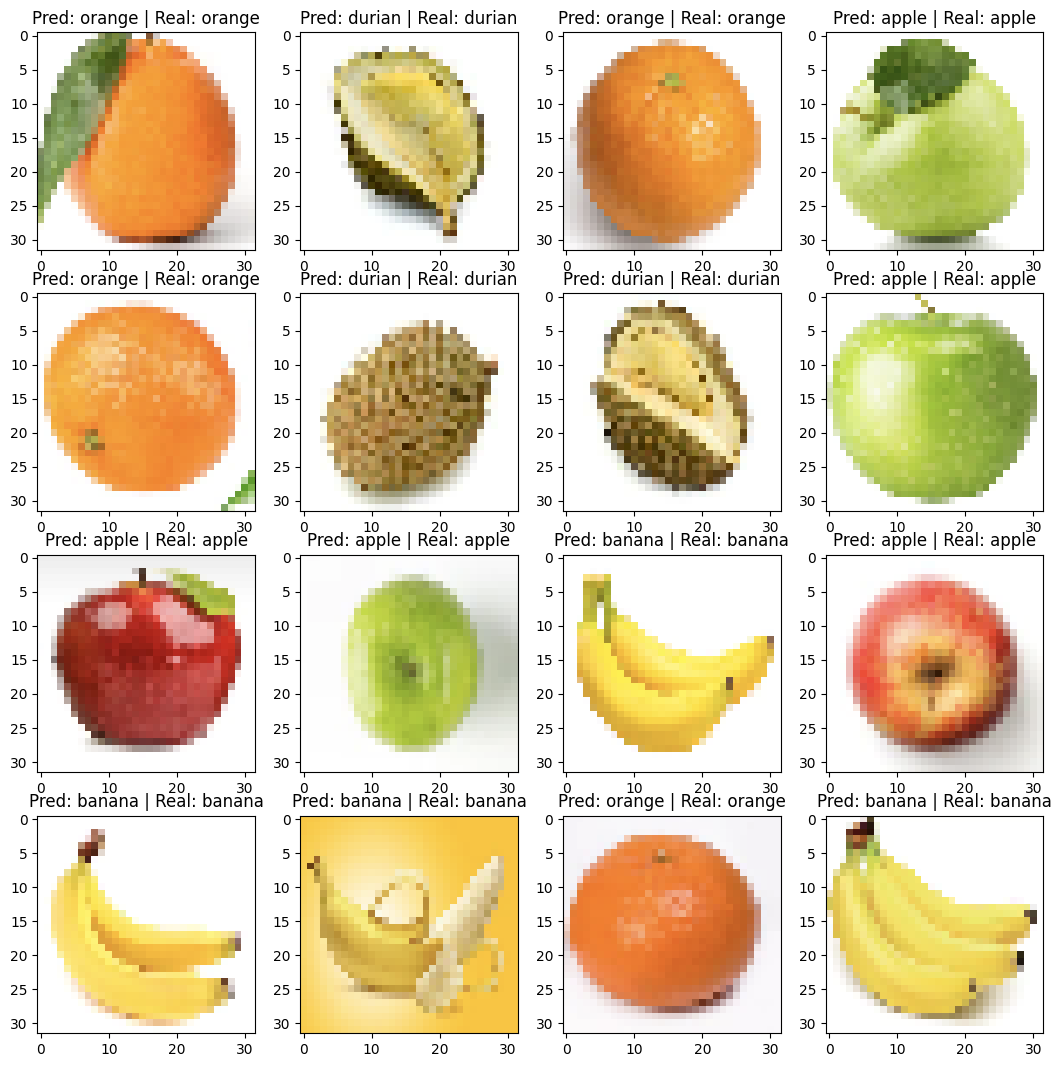

In [417]:
import numpy

plt.figure(figsize=(13,13))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

Save the model

In [418]:
model.save('model.keras')